In [1]:
from datascience import *
from collections import Counter
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plot
#plot.style.use('fivethirtyeight')

## Data

We'll continue using the NCVS data for this lab!

In [2]:
incidents = pd.read_csv('../data/anes/ANES_legalst123_cleaned.csv')
incidents.head()

,Unnamed: 0,pre_election_weight_ftf,post_election_weight_ftf,pre_voting_status,pre_economy_last_year,pre_party_id,pre_gun_access_importance,pre_unauthorized_immigrants,pre_birthright_citizenship,pre_govt_assist_to_blacks,...,post_discrim_christian,post_discrim_transgender,post_discrim_personal,post_skintone,post_discrim_skintone,post_support_trump,post_gender,post_age_est,post_inform_level,post_intelligence
0,0,0.887,0.927,3,5.0,7.0,2.0,3.0,4.0,7.0,...,4.0,4.0,NaN,3.0,4.0,NaN,NaN,NaN,4.0,4.0
1,1,1.160,1.084,3,3.0,6.0,1.0,1.0,1.0,7.0,...,4.0,1.0,NaN,3.0,4.0,NaN,NaN,NaN,1.0,2.0
2,2,0.416,0.398,1,3.0,3.0,2.0,1.0,7.0,7.0,...,2.0,1.0,NaN,2.0,4.0,NaN,NaN,NaN,4.0,3.0
3,3,0.385,0.418,4,3.0,5.0,1.0,3.0,4.0,5.0,...,3.0,2.0,NaN,4.0,4.0,NaN,NaN,NaN,2.0,2.0
4,4,0.693,0.726,3,3.0,3.0,1.0,3.0,6.0,7.0,...,2.0,3.0,NaN,2.0,5.0,NaN,NaN,NaN,4.0,3.0


## Empirical Distributions

### Data Manipulation and Plotting Review

Write code that saves the "post_liberal_rating" column in the NCVS data to a Series variable, and only includes values below 150.

In [3]:
liberal = incidents.loc[:, "post_liberal_rating"]
liberal = liberal.where(liberal < 150)

Plot a histogram of the data:

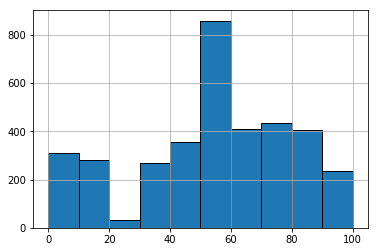

In [4]:
liberal.hist()

### Question 1

What patterns do you notice about the histogram? Is the distribution left or right skewed? What does the skew suggest about what cash values are usually implicated in crime?

### Law of Averages

Write a function, "empirical_hist_crime" that takes a Series and a sample size as its argument, and then draws a histogram based on the results. Consult the book for help!

In [5]:
def empirical_hist_crime(series, n):
    series.sample(n).hist()

Check how many rows are in the table with the "size" method, and then use your self-defined function to plot histograms taking sample sizes 10, 100, 1000, and the total number of rows.

In [6]:
liberal.size

4271

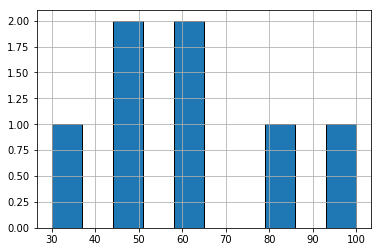

In [7]:
empirical_hist_crime(liberal, 10)

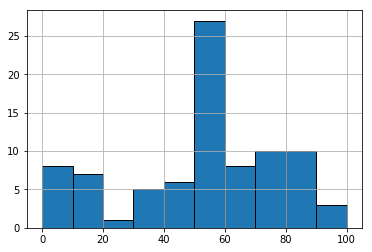

In [8]:
empirical_hist_crime(liberal, 100)

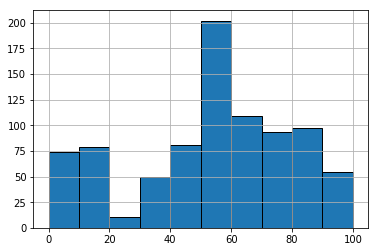

In [9]:
empirical_hist_crime(liberal, 1000)

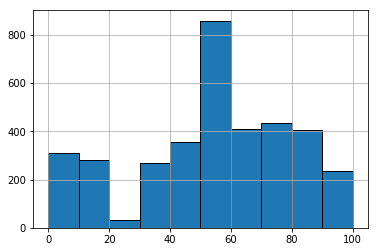

In [10]:
empirical_hist_crime(liberal, liberal.size)

### Question 2

What happens to the histograms (compared to the original frin Q1) as you increase the sample size? How does this relate to the Law of Averages? What is the relationship between sample size and population parameter estimation?

## Hypothesis Testing

In this section, we'll cover the basic tools for hypothesis testing!

### Jury Selection

First, we'll use the jury selection example from the book. Here, we are concerned with making sure that the racial composition of a jury is not statistically different from the racial composition of the population.

In [11]:
# Create the table
jury = pd.DataFrame(data = {'Ethnicity': ['Asian', 'Black', 'Latino', 'White', 'Other'],
                           'Eligible': [0.15, 0.18, 0.12, 0.54, 0.01],
                           'Panels': [0.26, 0.08, 0.08, 0.54, 0.04]}
)

jury

,Ethnicity,Eligible,Panels
0,Asian,0.15,0.26
1,Black,0.18,0.08
2,Latino,0.12,0.08
3,White,0.54,0.54
4,Other,0.01,0.04


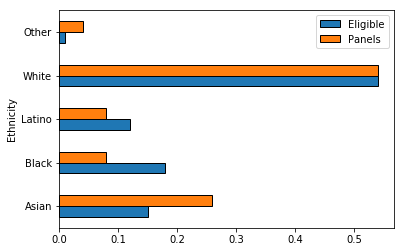

In [12]:
# Horizontal Bar Chart
jury.plot.barh('Ethnicity')

In [13]:
# Augment with the difference between the "panels" columns and "eligible" column
jury_with_diffs = jury.assign(Difference = jury.loc[:, 'Panels'] - jury.loc[:, 'Eligible'])
jury_with_diffs

,Ethnicity,Eligible,Panels,Difference
0,Asian,0.15,0.26,0.11
1,Black,0.18,0.08,-0.10
2,Latino,0.12,0.08,-0.04
3,White,0.54,0.54,0.00
4,Other,0.01,0.04,0.03


Write code that does a t-test between the "Eligible" and "Panels" columns. Hint: https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind

In [14]:
stats.ttest_ind(jury_with_diffs['Eligible'], jury_with_diffs['Panels'], equal_var = False)

Ttest_indResult(statistic=0.0, pvalue=1.0)

### Hypothesis Testing on NCVS Data

Now let's try with the NCVS data! Write code that creates a new DataFrame with the "post_liberal_rating" and "post_conservative_rating" as columns, and only includes values below 150.

In [15]:
value_lost = incidents.loc[:, ["post_liberal_rating", "post_conservative_rating"]]
value_lost = value_lost.where(value_lost["post_liberal_rating"] < 150)
value_lost = value_lost.where(value_lost["post_conservative_rating"] < 150)

value_lost.head()

,post_liberal_rating,post_conservative_rating
0,50.0,70.0
1,50.0,60.0
2,50.0,50.0
3,50.0,50.0
4,70.0,70.0


### Question 3

Plot a histogram of both the post liberal rating and post conservating rating side by side. Experiment with different bin widths. Visually, what can you infer about the shape of each data?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122ca4e80>,
      dtype=object)

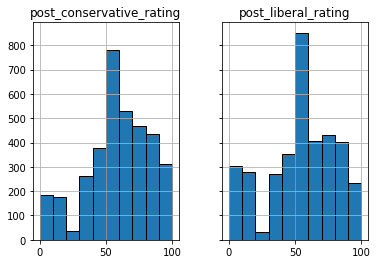

In [16]:
value_lost.hist(sharex=True, sharey=True)

### Question 4

Now write code to do a t-test between liberl and conservative. Remember to remove NaN values first.

In [17]:
value_lost.dropna(inplace=True)

In [18]:
stats.ttest_ind(value_lost['post_liberal_rating'], value_lost['post_conservative_rating'], equal_var = False)

Ttest_indResult(statistic=-7.614943160878035, pvalue=2.979529907898513e-14)